<a href="https://colab.research.google.com/github/fendpray18/NLP/blob/master/NLP%20Basic%20Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Tutorial Basic NLP

As we know that NLP (natural language processing) is used to do for text processing. There are few step/techincal that we can understand :


1.   **Case Folding**
2.   **Tokenizing**
3.   **Filtering & Stemming**

Text processing using a tool library with NLTK.


#First Step : Downloading NLTK Package

In [ ]:
pip install nltk

In [ ]:
import nltk
#nltk.download('wordnet') #call the nltk downloader
#nltk.download('popular', quiet=True) # for downloading packages
nltk.download('punkt') # first-time use only
#nltk.download('wordnet') # first-time use only


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

#An Example 

There is no consider to be one by step on this learning. Just ignoring and see the purpose example.

In [ ]:
from nltk.stem import WordNetLemmatizer #nltk.stem is a package that performs stemming using different classes
wnl = WordNetLemmatizer() #fuction for using lemma (as derived word and root word, ex : ran => run)
print(wnl.lemmatize('leaves'))


leaf


#Ready to the Text Processing Step


**1. Case Folding**

A process to convert text to be standard text. In case for this step, it can be used a function, as lower text / **.lower()**



In [ ]:
text = str(input("Please write sentence (no need much word, it just can be 5 word maximum) : "))

print("\nInput Text : {} \n" .format(text))

lower_text = text.lower()
print("Case Folding Text :", lower_text)

Please write sentence (no need much word, it just can be 5 word maximum) : saya adalah Fendy Prayogi

Input Text : saya adalah Fendy Prayogi 

Case Folding Text : saya adalah fendy prayogi


**2. Tokenizing**

In next step, we can change that text to be one by one word or we can know it as "LIST". There are 2 function list from tokenizing step :

1. **Sentence List : function sent_tokenize()**

2. **Word List : function word_tokenize()**

The differents of these function are convert list into text. In other case, there have funtion to remove text, like removing whitespace, mark text, and number.

*   **Removing Number** => use a function is **re.sub(pattern, replace_string, string)**
*   **Removing Punctuation** => use **.translate() /convert pattern mapping char and using function .maketrans()**
*   **Removing Whitespace** => use function is **.strip()** to remove whitespacing leading and trailing, and use **re.sub(pattern, replace_string, string)** if there have amount value of one or more whitespace 







In [ ]:
import string #package consist of character
import re #regex library

# import word_tokenize from NLTK
from nltk.tokenize import word_tokenize 

# sentence input
sentence = "Sebelumnya, \n kasus positif virus Corona pada 24 April sebanyak 8.211 orang. \n Jumlah pasien sembuh Corona di RI ada 1.002 orang dan meninggal 689 orang."


# ------ Case Folding --------
# gunakan fungsi .lower()
lowercase_sentence = sentence.lower()

print('Case Folding Result : \n')
print(lowercase_sentence)
print('\n\n\n')

# ------ Tokenizing ---------
#remove angka
lowercase_sentence = re.sub(r"\d+", "", lowercase_sentence)

#remove punctuation
lowercase_sentence = lowercase_sentence.translate(str.maketrans("","",string.punctuation))

#remove whitespace leading & trailing
lowercase_sentence = lowercase_sentence.strip()

#remove multiple whitespace into single whitespace
lowercase_sentence = re.sub('\s+',' ',lowercase_sentence)


tokens = nltk.tokenize.word_tokenize(lowercase_sentence)

print('Tokenizing Result : \n') 
print(tokens)

Case Folding Result : 

sebelumnya, 
 kasus positif virus corona pada 24 april sebanyak 8.211 orang. 
 jumlah pasien sembuh corona di ri ada 1.002 orang dan meninggal 689 orang.




Tokenizing Result : 

['sebelumnya', 'kasus', 'positif', 'virus', 'corona', 'pada', 'april', 'sebanyak', 'orang', 'jumlah', 'pasien', 'sembuh', 'corona', 'di', 'ri', 'ada', 'orang', 'dan', 'meninggal', 'orang']


And then we can calculate amount of each word on sentence, using function .**freqDist()** in NLTK Library, and showing the result with **.most_common()**

In [ ]:
from nltk.probability import FreqDist

calculate_word = nltk.FreqDist(tokens)

print("===The Result for Knowing Amount of Word===\n")
print(calculate_word.most_common())

===The Result for Knowing Amount of Word===

[('orang', 3), ('corona', 2), ('sebelumnya', 1), ('kasus', 1), ('positif', 1), ('virus', 1), ('pada', 1), ('april', 1), ('sebanyak', 1), ('jumlah', 1), ('pasien', 1), ('sembuh', 1), ('di', 1), ('ri', 1), ('ada', 1), ('dan', 1), ('meninggal', 1)]


#Using Pandas Library for Making A Visualization

We can convert value from function **.FreqDist()** to visualization diagram using Pandas Dataframe with function **pd.DataFrame.from_dict()** and parameter **(orient='index')** /change key dictionary become row dataframe. Then, using function **.plot()** and **(kind='bar')** for bar plot.


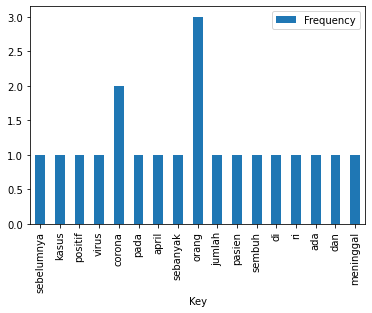

In [ ]:
import pandas as pd

df_freq_tokens = pd.DataFrame.from_dict(calculate_word, orient='index')
df_freq_tokens.columns = ['Frequency']
df_freq_tokens.index.name = 'Key'

df_freq_tokens.plot(kind='bar')

#Filtering (Stopword Removal)
is used to filtrate result for word which important word if word often appeared on sentences, it cant count called **"Stopword"**. Example : the, that, etc. 

We can use the function is **.stopword()** on NLTK library.


In [ ]:
from nltk.corpus import stopwords

# download function stopword from NLTK library
nltk.download('stopwords')

# tokenize text
calculate_word

# get Indonesian stopword 
list_stopwords = set(stopwords.words('indonesian'))

#remove stopword pada list token
tokens_without_stopword = [word for word in calculate_word if not word in list_stopwords]


print(tokens_without_stopword)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
['positif', 'virus', 'corona', 'april', 'orang', 'pasien', 'sembuh', 'ri', 'meninggal']


#STEMMING
is step reduce inflected for suffix and prefix to be word base. Almost similar with lemmatize.

As example in indonesian word is :
*   memelihara = pelihara
*   menjaga = jaga
*   bersantai = santai
*   terjebak = jebak

On Stemming, it have NLTK library that can use algorithm :
*   Porter algorithm
*   WordNet Lemmatizer algorithm
*   SnowBall algorithm
*   Lancester algorithm









In [ ]:
from nltk.stem import PorterStemmer 
   
stemmer = PorterStemmer() 
  
plurals = ['caresses', 'flies', 'dies', 'mules', 'denied',
        'died', 'agreed', 'owned', 'humbled', 'sized',
        'meeting', 'stating', 'siezing', 'itemization',
        'sensational', 'traditional', 'reference', 'colonizer',
        'plotted'] 
  
singles = [(plural + " : " + stemmer.stem(plural)) for plural in plurals]

singles

['caresses : caress',
 'flies : fli',
 'dies : die',
 'mules : mule',
 'denied : deni',
 'died : die',
 'agreed : agre',
 'owned : own',
 'humbled : humbl',
 'sized : size',
 'meeting : meet',
 'stating : state',
 'siezing : siez',
 'itemization : item',
 'sensational : sensat',
 'traditional : tradit',
 'reference : refer',
 'colonizer : colon',
 'plotted : plot']

But all of algorithms on above, is only can use for english, spanish, excepting indonesian.

We can use indonesian word thourgh text from library **SASTRAWI**.

In [ ]:
pip install sastrawi # download and install sastrawi package

     |████████████████████████████████| 215kB 4.0MB/s 


In [ ]:
# import Sastrawi package
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# create stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# token without stopword
list_tokens = tokens_without_stopword

# stem
output   = [(token + " : " + stemmer.stem(token)) for token in list_tokens]

output

['positif : positif',
 'virus : virus',
 'corona : corona',
 'april : april',
 'orang : orang',
 'pasien : pasien',
 'sembuh : sembuh',
 'ri : ri',
 'meninggal : tinggal']